# Import

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import PercentFormatter, MultipleLocator

# Results directory

In [10]:
RESULTS_DIR = Path("results/ITOR_V2_SRMP/")

# File

In [11]:
TRAIN_FILE = RESULTS_DIR / "train_results_bis.csv"
TEST_FILE = RESULTS_DIR / "test_results_bis.csv"

# Read files

In [12]:
df_train = pd.read_csv(TRAIN_FILE, index_col=list(range(16)))
df_test = pd.read_csv(TEST_FILE, index_col=list(range(18))).pivot(columns="Name").droplevel(0, axis=1)

# Merge data

In [13]:
df = df_test.join(df_train).reset_index()
df

,M,N_tr,Atr_id,Mo,Ko,Group_size,Mo_id,N_bc,Same_alt,Error,...,Config,Me_id,N_te,Ate_id,FITNESS,KENDALL,SPEARMAN,Time,Fitness,It
0,7,500,0,SRMP,1,1,0,100,True,0.1,...,0,0,5000,0,0.837432,0.763161,0.899959,1433.540514,0.940,522887.0
1,7,500,0,SRMP,1,1,0,100,True,0.2,...,0,0,5000,0,0.733693,0.530134,0.661002,2209.269563,0.910,514570.0
2,7,500,0,SRMP,1,1,0,1000,True,0.0,...,0,0,5000,0,0.990219,0.981624,0.995732,130.336448,1.000,14489.0
3,7,500,0,SRMP,1,1,0,1000,True,0.0,...,0,0,5000,0,0.990839,0.985796,0.997635,199.464018,1.000,16521.0
4,7,500,0,SRMP,1,1,0,1000,True,0.0,...,0,0,5000,0,0.991605,0.990706,0.996792,250.568661,1.000,14347.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,7,500,9,SRMP,1,1,9,500,True,0.3,...,0,9,5000,9,0.842380,0.713563,0.882816,3600.008198,0.736,216626.0
102,7,500,9,SRMP,1,1,9,1000,True,0.0,...,0,9,5000,9,0.992862,0.987106,0.995513,553.060935,1.000,43303.0
103,7,500,9,SRMP,1,1,9,1000,True,0.0,...,0,9,5000,9,0.988342,0.984327,0.995227,553.420004,1.000,35763.0
104,7,500,9,SRMP,1,1,9,1000,True,0.0,...,0,9,5000,9,0.983954,0.980450,0.995896,332.275559,1.000,25056.0


In [34]:
# df = pd.merge(
#     df_train,
#     df_test,
#     on=[
#         "M",
#         "N_tr",
#         "Atr_id",
#         "Mo",
#         "Ko",
#         "Group_size",
#         "Mo_id",
#         "N_bc",
#         "Same_alt",
#         "Error",
#         "D_id",
#         "Me",
#         "Ke",
#         "Method",
#         "Config",
#         "Me_id",
#     ],
#     suffixes=["_train", "_test"],
# )
# df

In [7]:
df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])]

,M,N_tr,Atr_id,Mo,Ko,Group_size,Mo_id,N_bc,Same_alt,Error,...,Config,Me_id,N_te,Ate_id,FITNESS,KENDALL,SPEARMAN,Time,Fitness,It
0,15,500,0,SRMP,1,1,0,100,True,0.0,...,0,0,5000,0,0.727026,0.463845,0.630107,103.739152,1.000,38137
16,15,500,0,SRMP,1,1,0,300,True,0.0,...,0,0,5000,0,0.909594,0.820820,0.950492,2384.512878,1.000,558876
32,15,500,0,SRMP,1,1,0,500,True,0.0,...,0,0,5000,0,0.940208,0.882027,0.972894,3600.006132,0.998,495466
48,15,500,0,SRMP,1,1,0,1000,True,0.0,...,0,0,5000,0,0.959674,0.920198,0.982383,703.818652,1.000,60850
64,15,500,0,SRMP,1,1,0,2000,True,0.0,...,0,0,5000,0,0.989986,0.980073,0.996445,912.177750,1.000,85841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,15,500,9,SRMP,1,1,9,1000,True,0.0,...,0,9,5000,9,0.979183,0.960187,0.993081,1062.211465,1.000,74498
1138,15,500,9,SRMP,1,1,9,2000,True,0.0,...,0,9,5000,9,0.986319,0.973131,0.992675,2466.249816,1.000,199765
1155,15,500,9,SRMP,2,1,9,100,True,0.0,...,0,9,5000,9,0.841961,0.683973,0.859827,120.048028,1.000,34232
1171,15,500,9,SRMP,2,1,9,300,True,0.0,...,0,9,5000,9,0.928627,0.857290,0.964064,579.206379,1.000,81294


# Plot

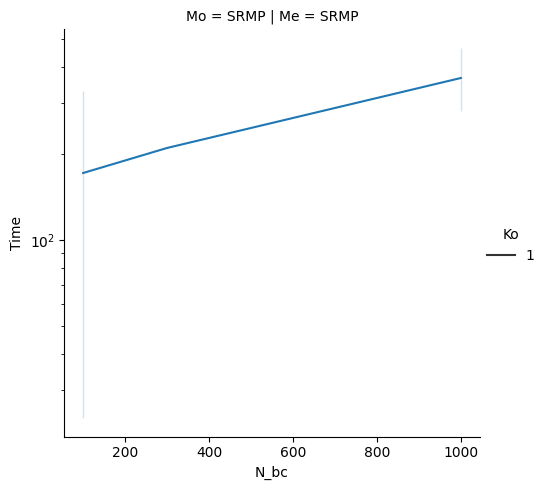

In [15]:
sns.relplot(
    data=df[(df["Error"] == 0) & (df["Fitness"] == 1)],
    x="N_bc",
    y="Time",
    # hue="Group_size",
    style="Ko",
    row="Mo",
    col="Me",
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)
plt.yscale("log")

## Train fitness

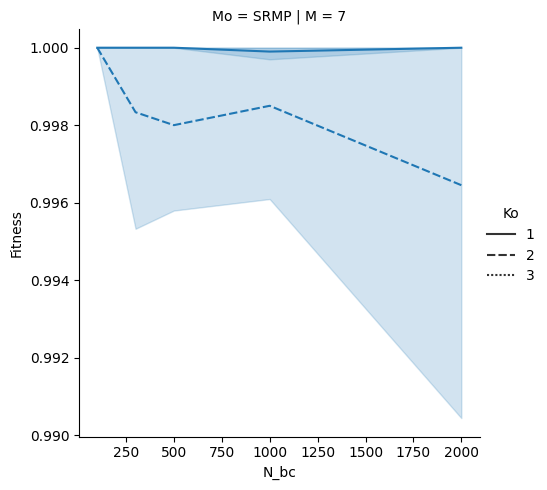

In [19]:
sns.relplot(
    data=df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])],
    x="N_bc",
    y="Fitness",
    style="Ko",
    # hue="Group_size",
    row="Mo",
    col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

## Test fitness

##### Test fitness :
- **augmente** avec le nombre de **comparaisons** (plus de données sur les préférences)
- ne **varie pas** avec le nombre de **profiles** (diminution attendue, modèle plus complexe)
- **diminue** avec le nombre de **critères** (données plus complexes)
- **augmente** quand les profiles sont partagés (moins de chances de se tromper de paramètres)
- **diminue** légèrement avec la taille du **groupe** (modèle plus complexe)

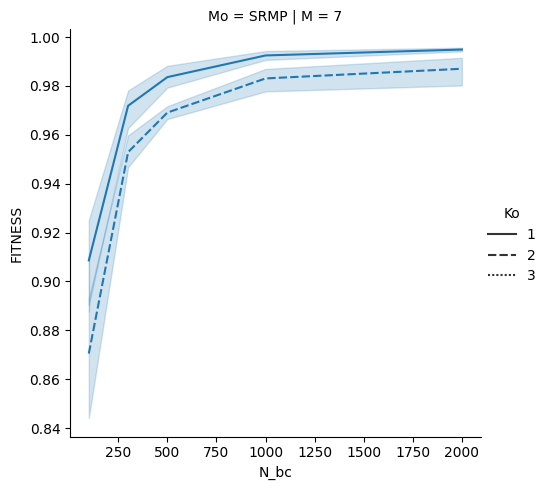

In [20]:
sns.relplot(
    data=df[(df["Error"] == 0) & (df["Ke"] == df["Ko"])],
    x="N_bc",
    y="FITNESS",
    style="Ko",
    # hue="Group_size",
    row="Mo",
    col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

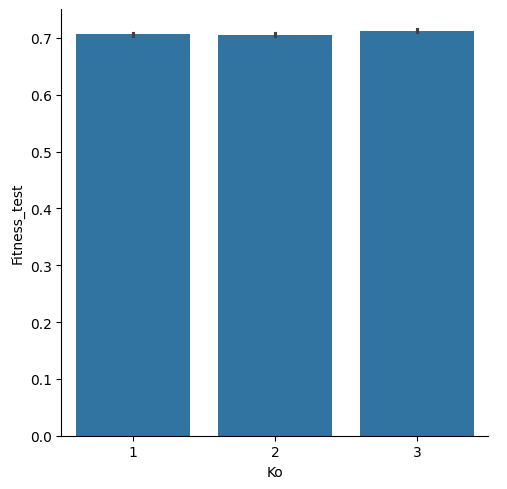

In [22]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="Ko",
    y="Fitness_test",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)

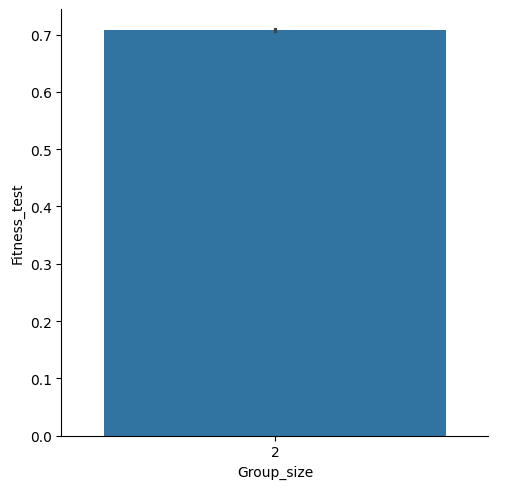

In [23]:
sns.catplot(
    data=dff,
    x="Group_size",
    y="Fitness_test",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)

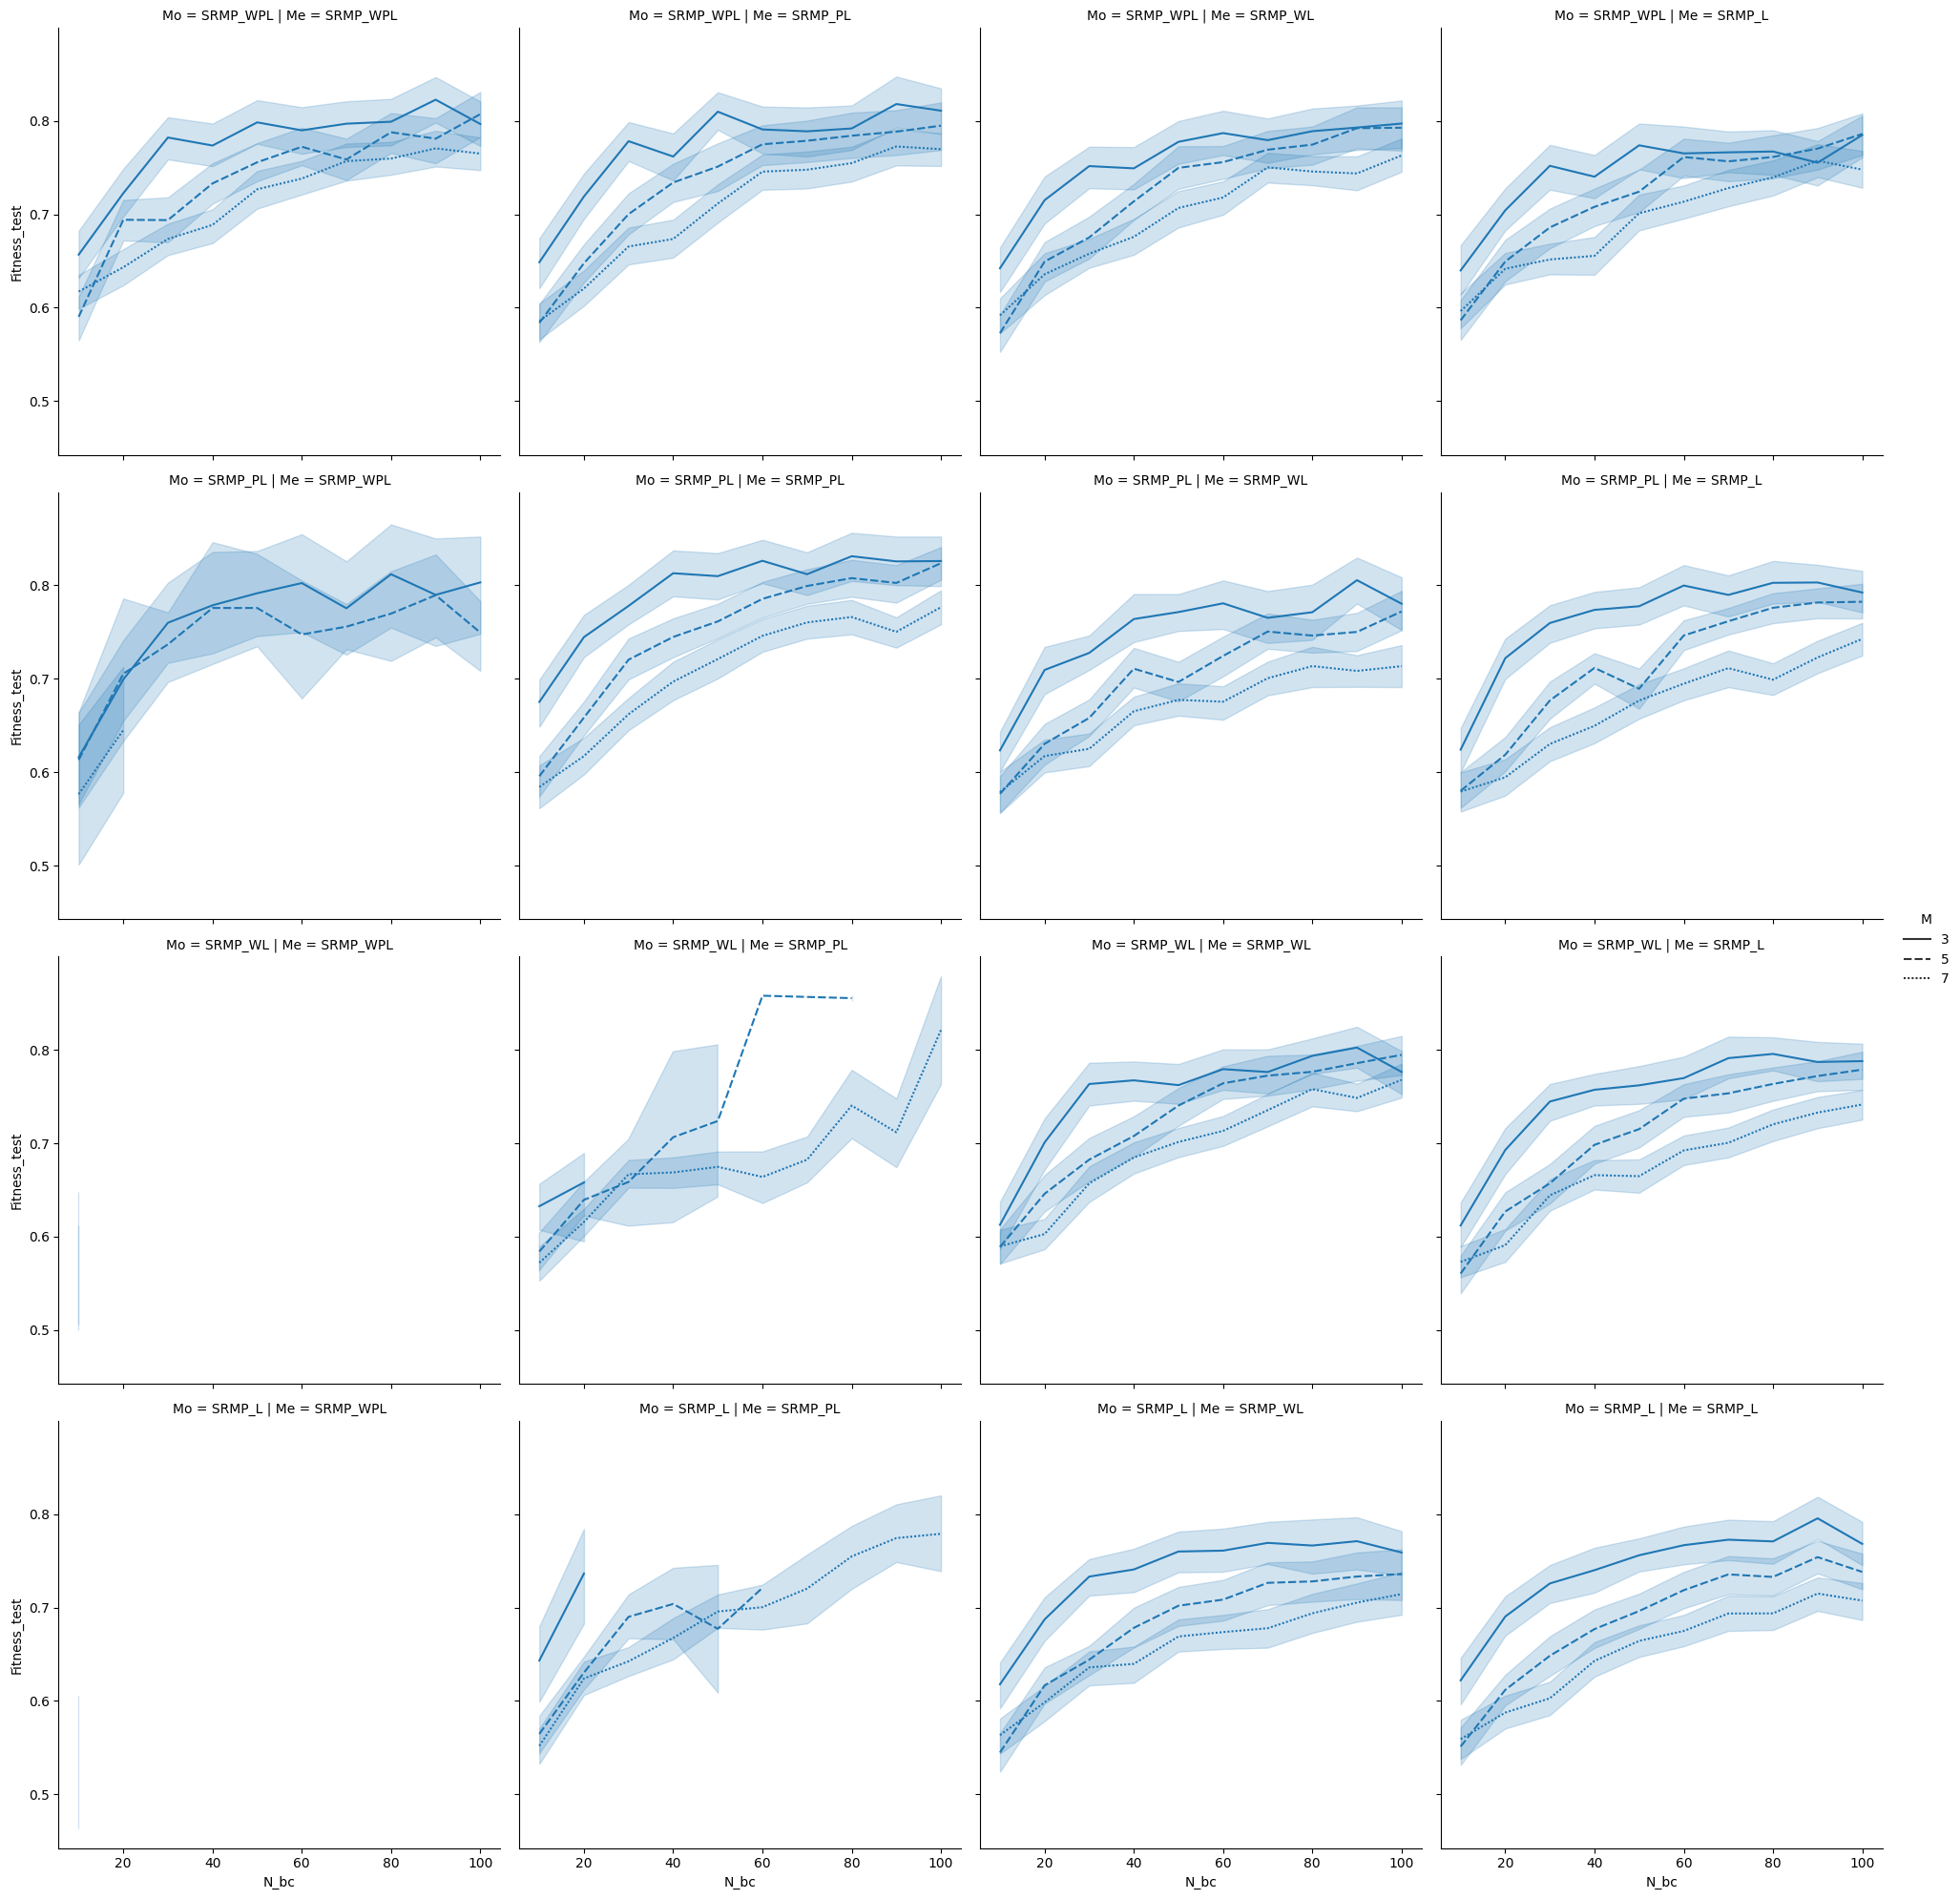

In [24]:
sns.relplot(
    data=dff[dff["Group_size"] == 2],
    x="N_bc",
    y="Fitness_test",
    style="M",
    # hue="Group_size",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

In [25]:
sns.relplot(
    data=dff[dff["Group_size"] == 3],
    x="N_bc",
    y="Fitness_test",
    style="M",
    # hue="Group_size",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

TypeError: 'NoneType' object is not iterable

## Kendall's tau

##### Kendall's tau :
- **augmente** avec le nombre de **comparaisons** (plus de données sur les préférences)
- **diminue** avec le nombre de **profiles** (modèle plus complexe)
- **diminue** avec le nombre de **critères** (données plus complexes)
- **augmente** quand les paramètres sont partagés (moins de chances de se tromper de paramètres)
- **diminue** légèrement avec la taille du **groupe** (modèle plus complexe)

<Axes: xlabel='Me', ylabel='Mo'>

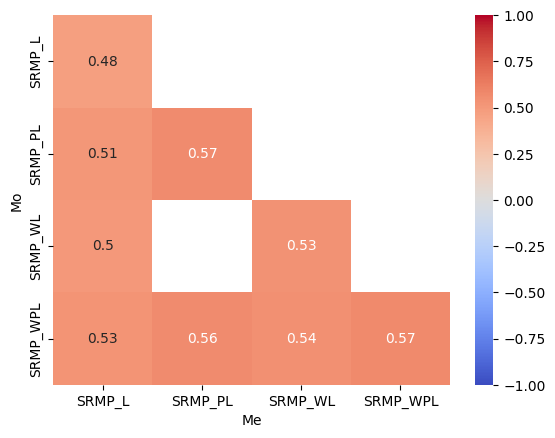

In [27]:
import numpy as np


sns.heatmap(
    data=dff.pivot_table(values="Kendall's tau", index="Mo", columns="Me", aggfunc="mean", fill_value=0),vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    mask=np.array([[0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 0, 0, 0]])
)

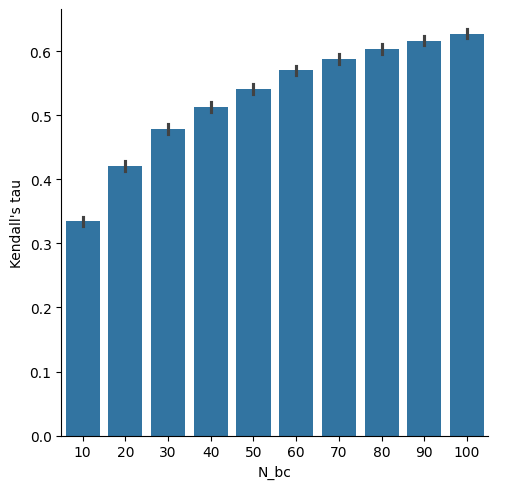

In [36]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="N_bc",
    y="Kendall's tau",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)

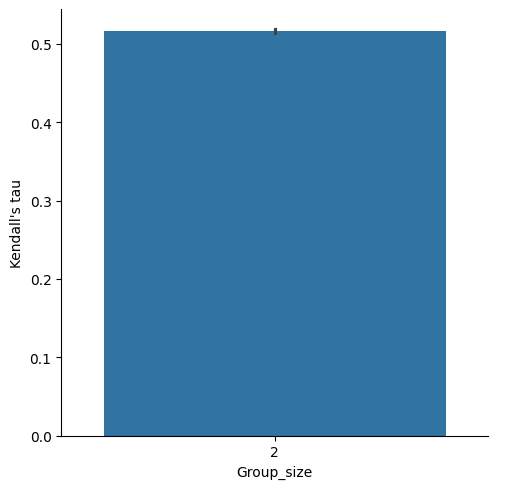

In [29]:
sns.catplot(
    data=dff,
    x="Group_size",
    y="Kendall's tau",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)

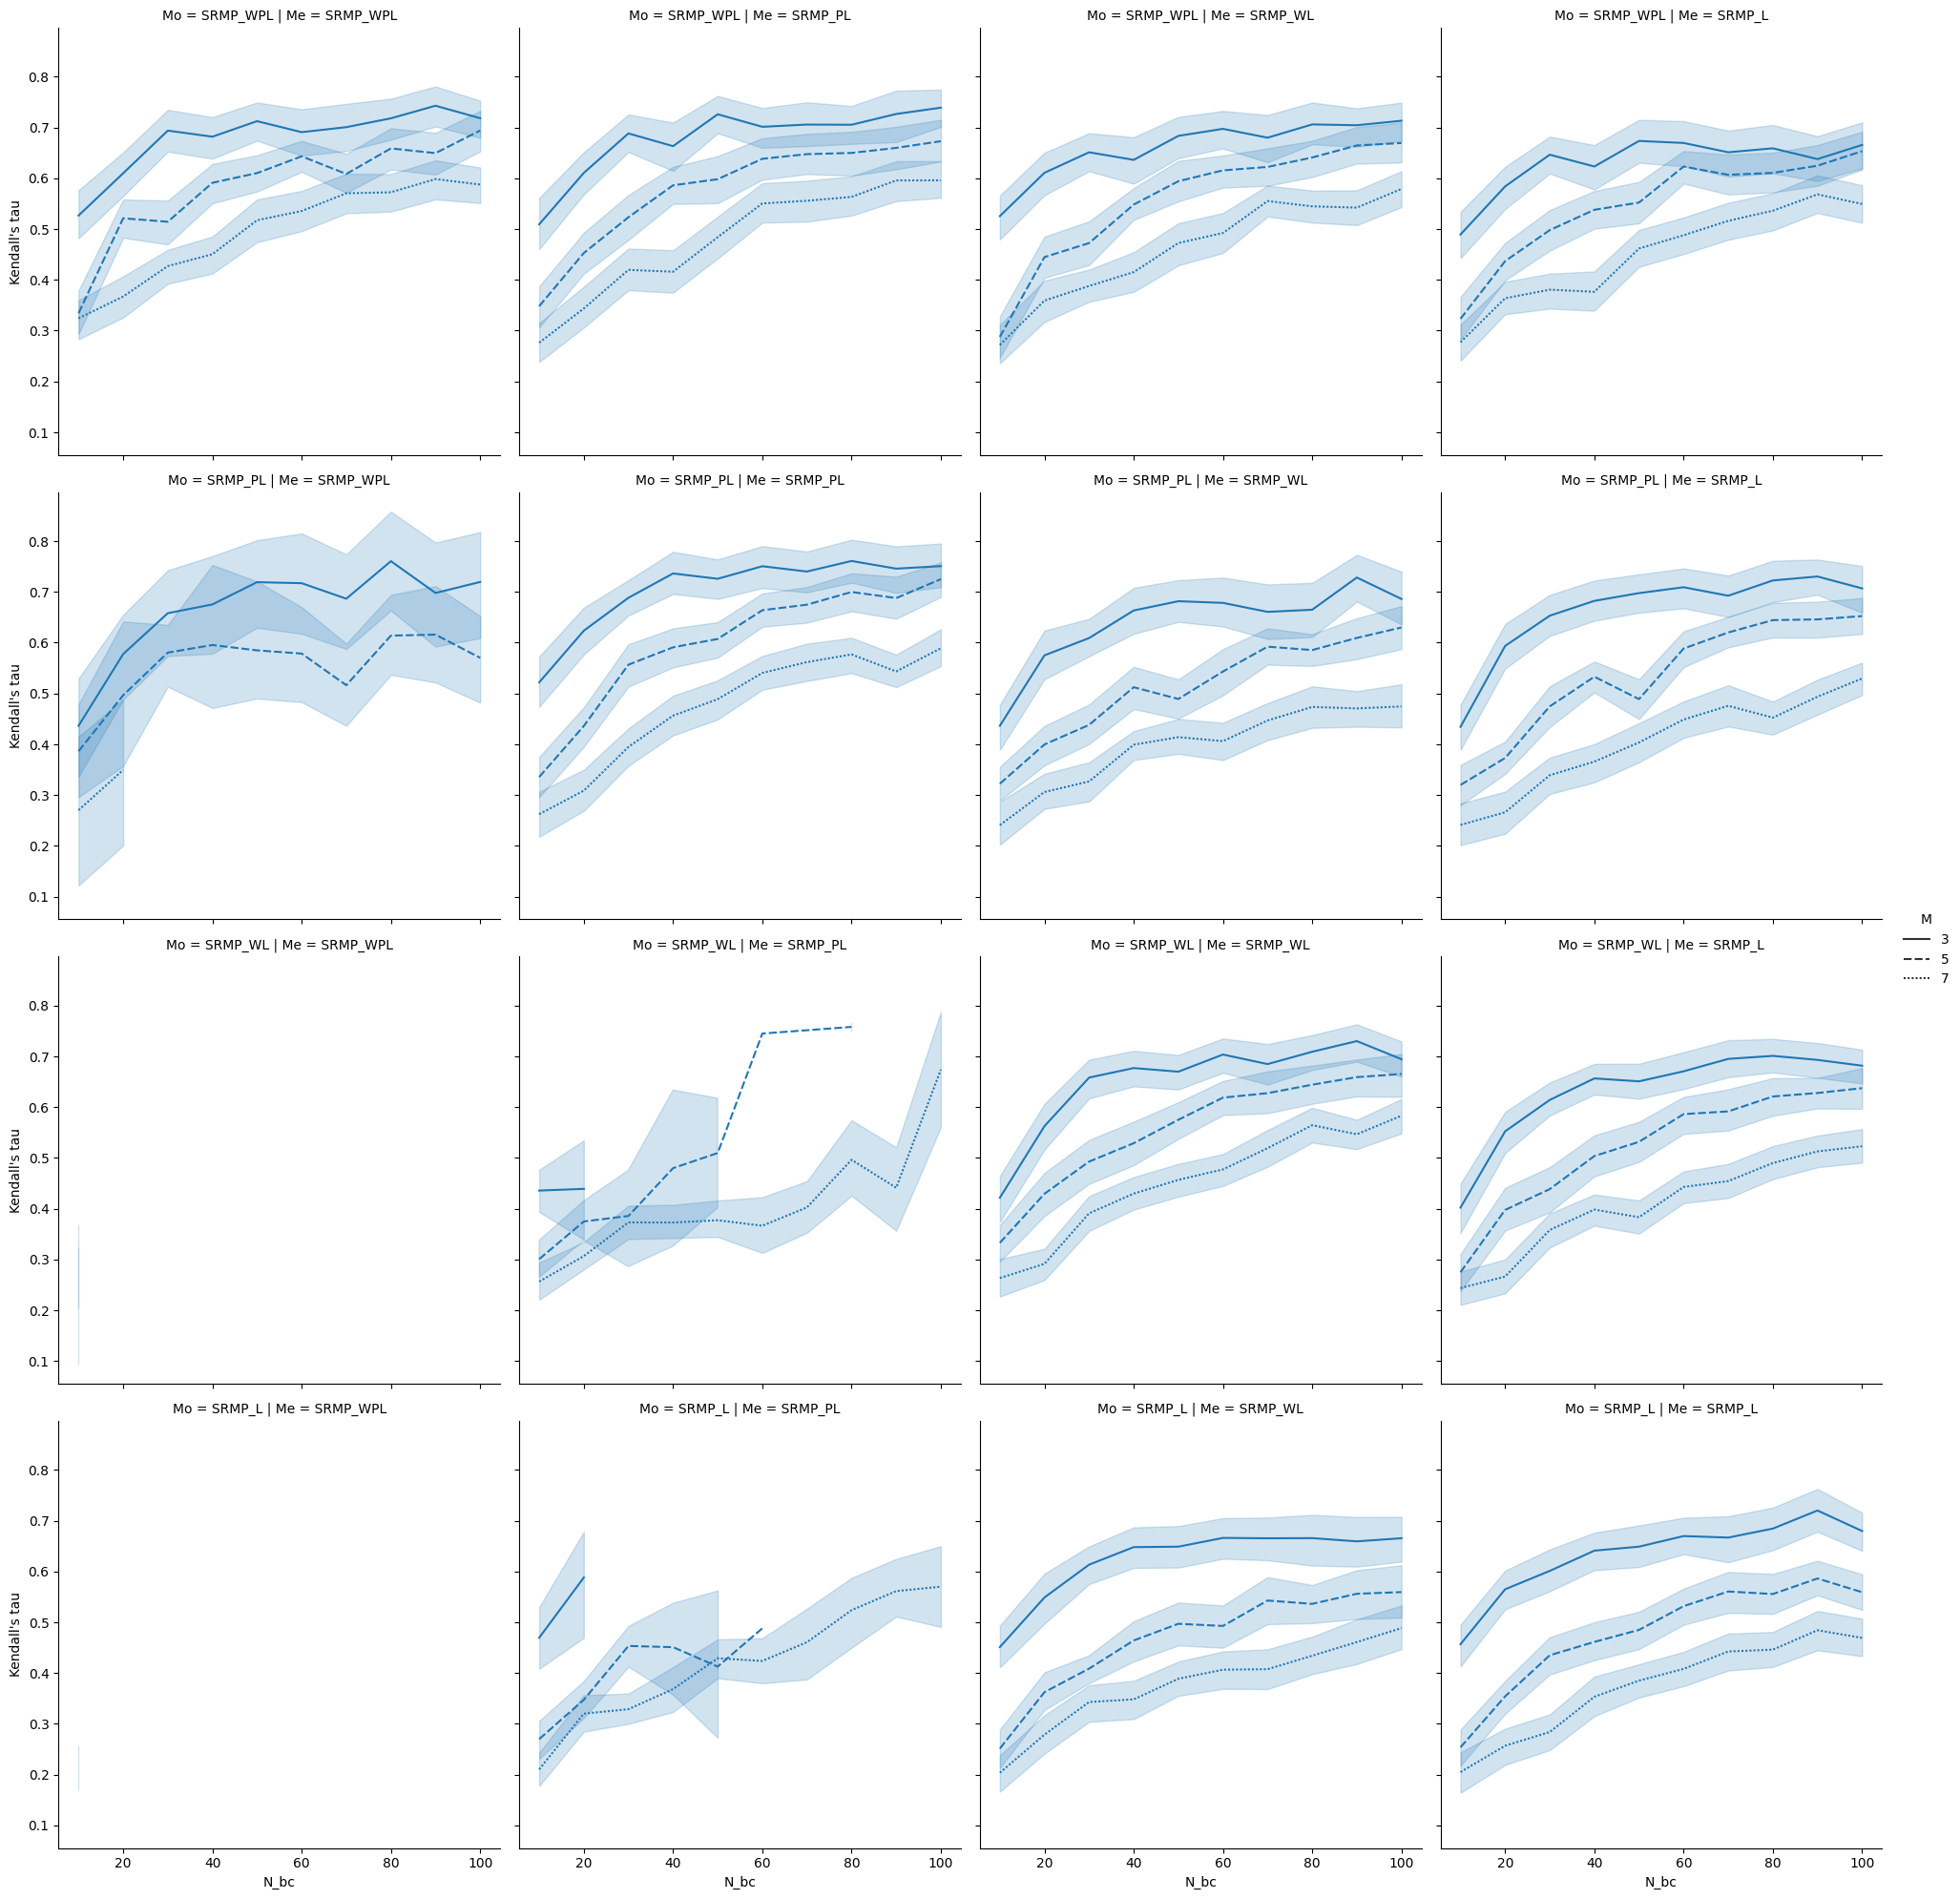

In [ ]:
sns.relplot(
    data=dff[dff["Group_size"] == 2],
    x="N_bc",
    y="Kendall's tau",
    style="M",
    # hue="Group_size",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

In [30]:
sns.relplot(
    data=dff[dff["Group_size"] == 3],
    x="N_bc",
    y="Kendall's tau",
    style="M",
    # hue="Group_size",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

TypeError: 'NoneType' object is not iterable

## Mo intra Kendall's tau

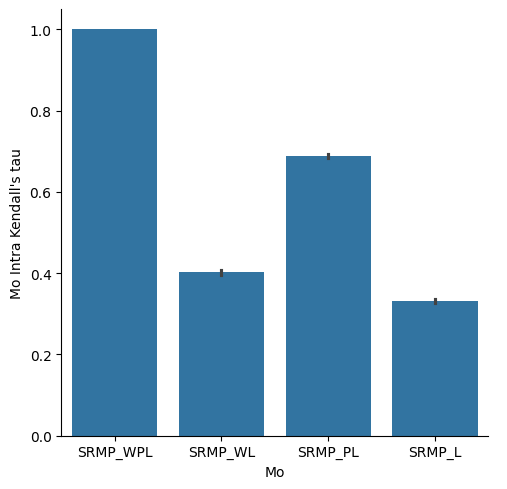

In [31]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="Mo",
    y="Mo Intra Kendall's tau",
    # hue="M",
    # hue="Group_size",
    # row="Mo",
    # col="Mo",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

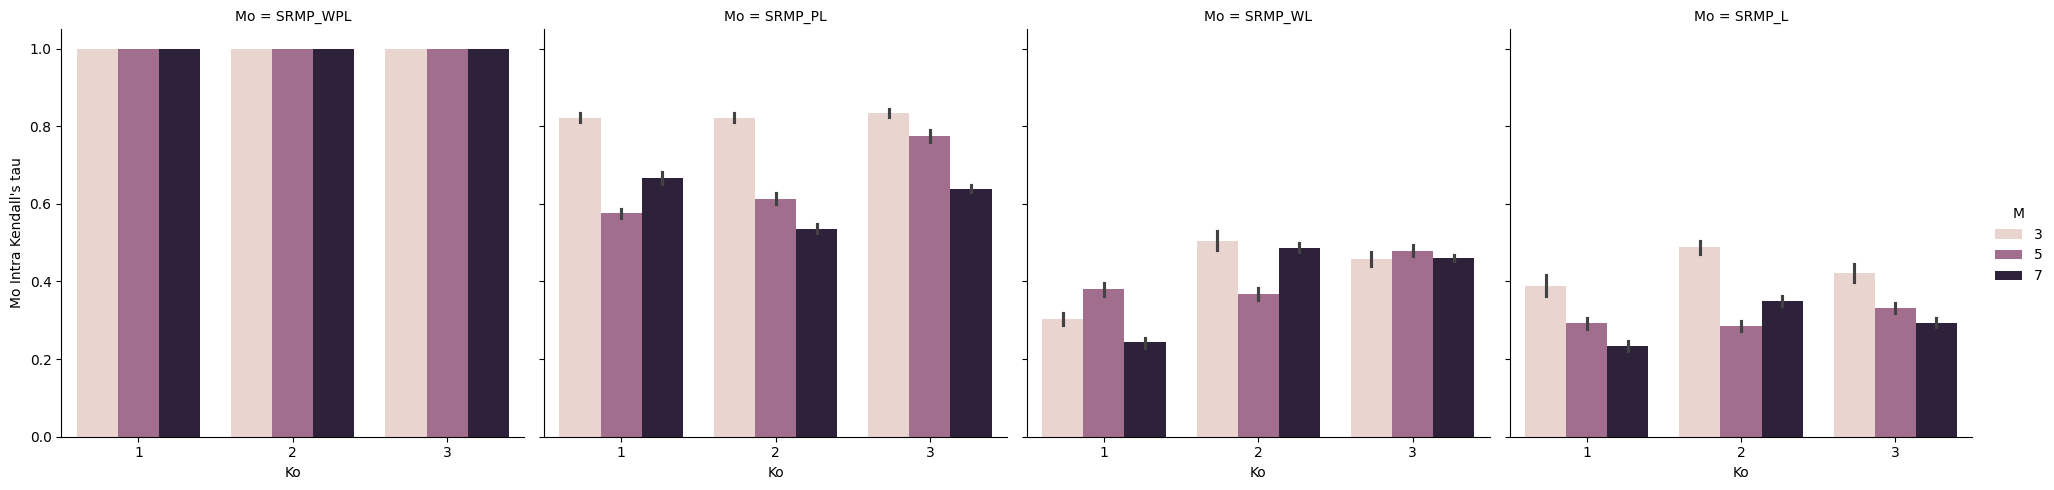

In [32]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="Ko",
    y="Mo Intra Kendall's tau",
    hue="M",
    # hue="Group_size",
    # row="Mo",
    col="Mo",
    # row_order=MODELS,
    col_order=MODELS,
    kind="bar",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

## Me intra Kendall's tau

<Axes: xlabel='Me', ylabel='Mo'>

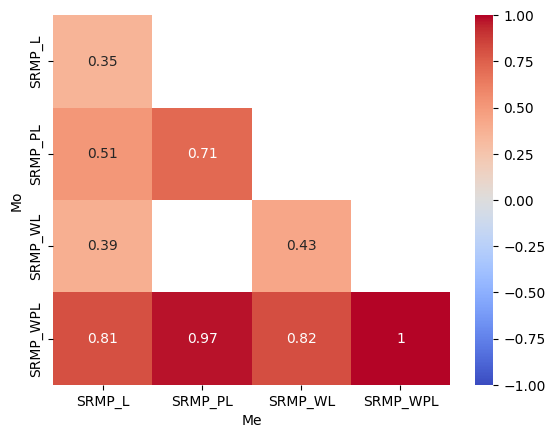

In [33]:
import numpy as np


sns.heatmap(
    data=dff.pivot_table(values="Me Intra Kendall's tau", index="Mo", columns="Me", aggfunc="mean", fill_value=0),vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    mask=np.array([[0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 0, 0, 0]])
)

<Axes: xlabel='Me', ylabel='Mo'>

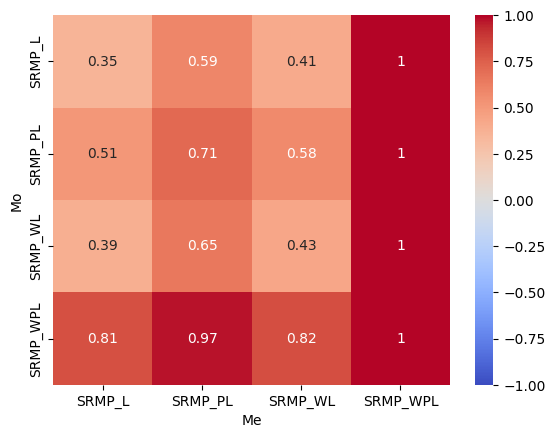

In [34]:
sns.heatmap(
    data=dff.pivot_table(values="Me Intra Kendall's tau", index="Mo", columns="Me", aggfunc="mean", fill_value=0),vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
)